## Exploratory Data Analysis Tinggi Gelombang Maksimum di Laut Utara dan Selatan Jawa
Pada notebook ini akan dilakukan exploratory data analysis (EDA) kondisi tinggi gelombang maksimum (Hmax) di Laut Utara dan Selatan Jawa. Informasi ini sangatlah penting untuk menjaga keamanan para nelayan. Sehingga disini akan dilakukan identifikasi waktu yang memiliki kondisi Hmax paling ekstrem, agar bisa menjadi referensi bagi para nelayan yg berlayar di Laut Utara dan Selatan Jawa. Sehingga untuk kedepannya bisa berhati-hati.

### Deskripsi Data yang Digunakan
Data yang digunakan dalam notebook ini merupakan data ERA5 yang diperoleh dari [situs Copernicus](https://cds.climate.copernicus.eu/#!/search?text=ERA5&type=dataset), dengan deskripsi data sebagai berikut:
- Resolusi ruang: 0.5 derajat
- Resolusi temporal: rata-rata 1 bulan
- Periode data: 1980-2019
- Variabel tinggi gelombang: tinggi gelombang signifikan (Hs)

Karena variabel tinggi gelombang yg ada pada data ini adalah **Hs**, maka perlu dikonversi menjadi **Hmax**, dengan perumusan berikut,
**Hmax = 2 * Hs**

In [105]:
# import library
from scipy.io import netcdf

# open file in a netCDF reader
#directory = 'Documents/Proyek KKP/Data Gelombang/'
wrf_file_name = 'monthly_mean_wave_ERA5_01_1980.nc'
nc = netcdf.netcdf_file(wrf_file_name, 'r')


C:\Users\titan\anaconda3\lib\site-packages\scipy\io\netcdf.py:317: RuntimeWarning:

Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)



In [106]:
import netCDF4 as nc4

metadata = nc4.Dataset(wrf_file_name, 'r')
metadata.variables

{'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(latitude)
     units: degrees_north
     long_name: latitude
 unlimited dimensions: 
 current shape = (81,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'longitude': <class 'netCDF4._netCDF4.Variable'>
 float32 longitude(longitude)
     units: degrees_east
     long_name: longitude
 unlimited dimensions: 
 current shape = (97,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'mdww': <class 'netCDF4._netCDF4.Variable'>
 float64 mdww(time, latitude, longitude)
     _FillValue: -32767.0
     missing_value: -32767
     units: degrees
     long_name: Mean direction of wind waves
     cell_methods: time: mean
 unlimited dimensions: time
 current shape = (1, 81, 97)
 filling on,
 'mpww': <class 'netCDF4._netCDF4.Variable'>
 float64 mpww(time, latitude, longitude)
     _FillValue: -32767.0
     missing_value: -32767
     units: s
     long_name: Mean period of wind waves
     cell_methods: tim

In [107]:
# look at available variables
nc.variables

OrderedDict([('latitude', <scipy.io.netcdf.netcdf_variable at 0x1b6059b87c8>),
             ('longitude', <scipy.io.netcdf.netcdf_variable at 0x1b6058dde48>),
             ('mdww', <scipy.io.netcdf.netcdf_variable at 0x1b60568bbc8>),
             ('mpww', <scipy.io.netcdf.netcdf_variable at 0x1b6059c1148>),
             ('mwd', <scipy.io.netcdf.netcdf_variable at 0x1b6059c12c8>),
             ('mwp', <scipy.io.netcdf.netcdf_variable at 0x1b6058f9888>),
             ('pp1d', <scipy.io.netcdf.netcdf_variable at 0x1b6056d2b08>),
             ('swh', <scipy.io.netcdf.netcdf_variable at 0x1b6059c3f88>),
             ('time', <scipy.io.netcdf.netcdf_variable at 0x1b6059c3f08>),
             ('wsk', <scipy.io.netcdf.netcdf_variable at 0x1b6059c0208>),
             ('wss', <scipy.io.netcdf.netcdf_variable at 0x1b6056d2fc8>)])

In [108]:
# look dimensions
nc.dimensions

OrderedDict([('latitude', 81), ('longitude', 97), ('time', None)])

In [109]:
import numpy as np
import pandas as pd

lat = pd.DataFrame(nc.variables['latitude'].data, columns=['latitude']).set_index(np.arange(0,81,1)).astype('float32')
lon = pd.DataFrame(nc.variables['longitude'].data, columns=['longitude']).set_index(np.arange(0,97,1)).astype('float32')

In [110]:
# look at a specific variables dimensions
nc.variables['wss'].dimensions

('time', 'latitude', 'longitude')

In [111]:
time = nc.variables['time'].data

In [112]:
# look at a specific variabels units
nc.variables['mpww'].units

b's'

In [113]:
swh = nc.variables['swh'].data
swh.shape

(1, 81, 97)

In [114]:
swh2 = np.append(swh, swh, axis=0)
swh2.shape

(2, 81, 97)

In [115]:
nc.variables['latitude'].data

array([ 20. ,  19.5,  19. ,  18.5,  18. ,  17.5,  17. ,  16.5,  16. ,
        15.5,  15. ,  14.5,  14. ,  13.5,  13. ,  12.5,  12. ,  11.5,
        11. ,  10.5,  10. ,   9.5,   9. ,   8.5,   8. ,   7.5,   7. ,
         6.5,   6. ,   5.5,   5. ,   4.5,   4. ,   3.5,   3. ,   2.5,
         2. ,   1.5,   1. ,   0.5,   0. ,  -0.5,  -1. ,  -1.5,  -2. ,
        -2.5,  -3. ,  -3.5,  -4. ,  -4.5,  -5. ,  -5.5,  -6. ,  -6.5,
        -7. ,  -7.5,  -8. ,  -8.5,  -9. ,  -9.5, -10. , -10.5, -11. ,
       -11.5, -12. , -12.5, -13. , -13.5, -14. , -14.5, -15. , -15.5,
       -16. , -16.5, -17. , -17.5, -18. , -18.5, -19. , -19.5, -20. ],
      dtype=float32)

In [116]:
swh[:,52,27]

array([0.87490611])

In [117]:
swh[0][1][2]

0.8786452626768537

In [118]:
import glob

my_files = [] 
for each_file in glob.glob('*.nc'):
   my_files.append(each_file)
print("There are " +str(len(my_files)) +" files")


There are 487 files


In [119]:
file_raw = pd.DataFrame(my_files, columns=['file name'])
file_raw

,file name
0,Data_swh_u10_v10_ERA5_2017_2020.nc
1,era5_test.nc
2,monthly_mean_wave_ERA5_01_1980.nc
3,monthly_mean_wave_ERA5_01_1981.nc
4,monthly_mean_wave_ERA5_01_1982.nc
...,...
482,swh_indo.nc
483,swh_indo_0817_0819.nc
484,swh_indo_test.nc
485,swh_indo_test1.nc


## Read and Load Desired Files

In [120]:
import re

def sort_file_name():
    
    # define file name
    file_name = "monthly_mean_wave_ERA5_01_1980.nc" #initiating file
    
    file_store = []
    
    for yyyy in range(1980, 2020): # our data have been recorded from 1980 - 2019
        
        yyyy = str(yyyy)
        file_name = re.sub(r"\d{4}", yyyy, file_name)
        for mm in range(1, 13):
            
            if mm < 10:
                mm = str(mm).zfill(2) + "_"# fill zero at the beginning of the string
            else:
                mm = str(mm) + "_"
                
            file_name = re.sub(r"\d{2}\_", mm, file_name)
            file_store.append(file_name)
      
    return file_store

In [121]:
def read_nc_file(list_files):
    
    list_swh = np.empty((1, 81, 97))
    list_time = np.empty((1))
    for file in list_files:
        nc_file = netcdf.netcdf_file(file, 'r')
        swh = nc_file.variables['swh'].data
        time = nc_file.variables['time'].data
        list_swh = np.concatenate([list_swh, swh], axis=0)
        list_time = np.concatenate([list_time, time], axis=0)
        
    return list_swh, list_time

In [122]:
print(swh.shape)


(1, 81, 97)


In [123]:
file_store = sort_file_name()
list_swh, list_time = read_nc_file(file_store)
list_swh.shape

C:\Users\titan\anaconda3\lib\site-packages\scipy\io\netcdf.py:317: RuntimeWarning:

Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)



(481, 81, 97)

In [124]:
list_time.shape

(481,)

In [125]:
file_sup = pd.DataFrame(file_store, columns=['file name'])
file_sup

,file name
0,monthly_mean_wave_ERA5_01_1980.nc
1,monthly_mean_wave_ERA5_02_1980.nc
2,monthly_mean_wave_ERA5_03_1980.nc
3,monthly_mean_wave_ERA5_04_1980.nc
4,monthly_mean_wave_ERA5_05_1980.nc
...,...
475,monthly_mean_wave_ERA5_08_2019.nc
476,monthly_mean_wave_ERA5_09_2019.nc
477,monthly_mean_wave_ERA5_10_2019.nc
478,monthly_mean_wave_ERA5_11_2019.nc


### Set to specific location
Pada bagian ini akan dipilih masing-masing dua lokasi yang mewakili kondisi di Laut Utara dan Selatan Jawa, dengan:
- Laut Utara Jawa: Perairan Indramayu dan Pelabuhan Karang Ratu
- Laut Selatan Jawa: Perairan Cilacap dan Pangandaran

In [126]:
# 1
print("1")
display(lat[lat['latitude'] == np.round(-7.833)])
display(lon[lon['longitude'] == np.round(108.97)])

# 2
print("\n2")
display(lat[lat['latitude'] == np.round(-7.83)])
display(lon[lon['longitude'] == np.round(108.53)])

# 3
print("\n3")
display(lat[lat['latitude'] == np.round(-6.17)])
display(lon[lon['longitude'] == np.round(108.4)])

# 4
print("\n4")
display(lat[lat['latitude'] == np.round(-5.9)])
display(lon[lon['longitude'] == np.round(106.2)])

1


,latitude
56,-8.0


,longitude
34,109.0



2


,latitude
56,-8.0


,longitude
34,109.0



3


,latitude
52,-6.0


,longitude
32,108.0



4


,latitude
52,-6.0


,longitude
28,106.0


In [127]:
waktu = pd.period_range('1980-01', periods=480, freq='M')

In [128]:
time = pd.DataFrame(list_time[1:])
hs1 = pd.DataFrame(list_swh[1:,56,34], columns=['Cilacap']).set_index(waktu)
hs1.index = hs1.index.to_series().astype(str)
hs2 = pd.DataFrame(list_swh[1:,56,34], columns=['Pangandaran']).set_index(waktu)
hs2.index = hs1.index.to_series().astype(str)
hs3 = pd.DataFrame(list_swh[1:,52,32], columns=['Indramayu']).set_index(waktu)
hs3.index = hs1.index.to_series().astype(str)
hs4 = pd.DataFrame(list_swh[1:,52,27], columns=['Pelabuhan Karang Ratu']).set_index(waktu)
hs4.index = hs1.index.to_series().astype(str)
hs4

,Pelabuhan Karang Ratu
1980-01,0.874906
1980-02,0.686353
1980-03,0.728865
1980-04,0.668049
1980-05,0.694449
...,...
2019-08,0.982978
2019-09,0.913608
2019-10,0.933700
2019-11,0.775037


In [129]:
hmax1 = 2 * hs1
hmax2 = 2 * hs2
hmax3 = 2 * hs3
hmax4 = 2 * hs4

In [130]:
nc.variables['time'].units

b'hours since 1900-01-01 00:00:00.0'

## Plotting Data

In [131]:
import folium

# Create interactive map with default basemap
my_map = folium.Map(location=[-7.833, 108.97],
                   zoom_start=6.5)

# Pass a string in popup parameter 
folium.Marker([-7.833, 108.97], 
               popup = ' Cilacap ', icon=folium.Icon(color='red')).add_to(my_map)

folium.Marker([-7.833, 108.53], 
               popup = ' Pangandaran ', icon=folium.Icon(color='blue')).add_to(my_map)

folium.Marker([-6.16, 108.4], 
               popup = ' Indramayu ', icon=folium.Icon(color='green')).add_to(my_map)

folium.Marker([-5.9, 106.2], 
               popup = ' Pelabuhan Karang Ratu ', icon=folium.Icon(color='black')).add_to(my_map)

my_map

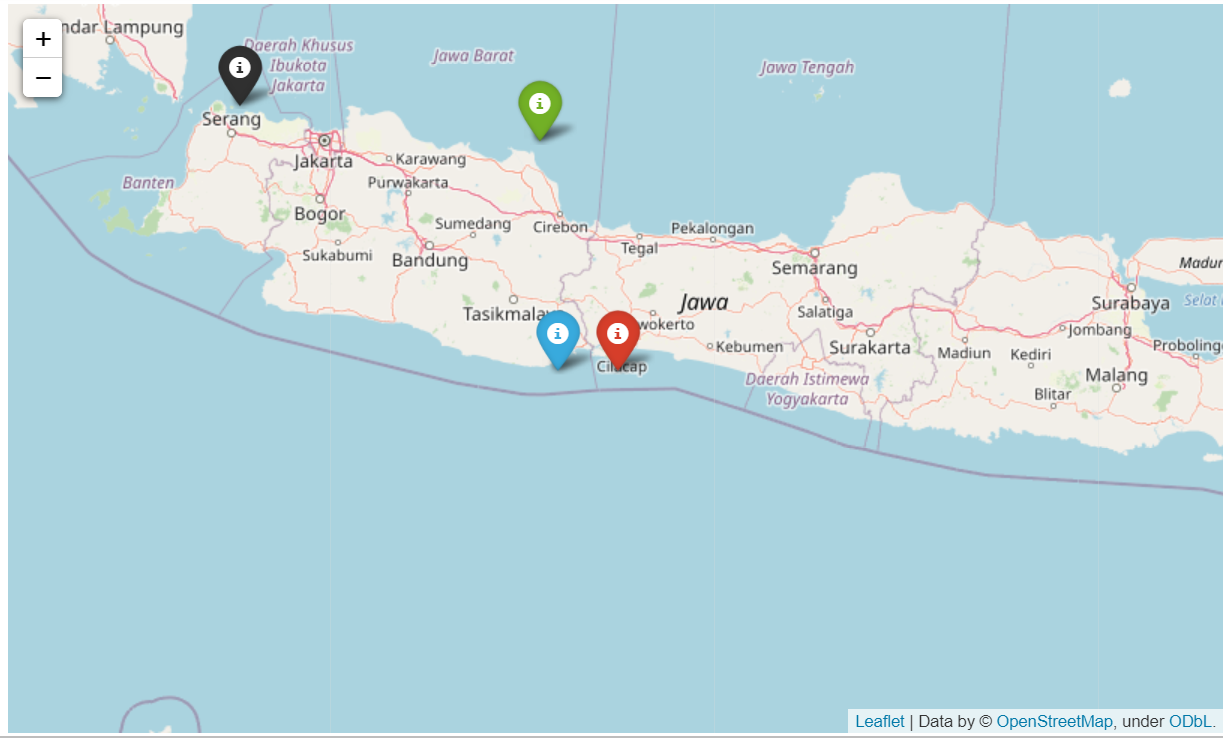

In [132]:
#from IPython.display import Image, display
#display(Image(filename='lokasi.png', embed=True))

### Legend Lokasi
- **Merah: Cilacap**
- **Biru: Pangandaran**
- **Hijau: Indramayu**
- **Hitam: Pelabuhan Karang Ratu**

In [133]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rcParams
rcParams["font.weight"] = "bold"
rcParams["axes.labelweight"] = "bold"

rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.labelweight'] = 'bold'
rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

rcParams['legend.fontsize'] = 16

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.it'] = 'STIXGeneral:italic'
rcParams['mathtext.bf'] = 'STIXGeneral:italic:bold'

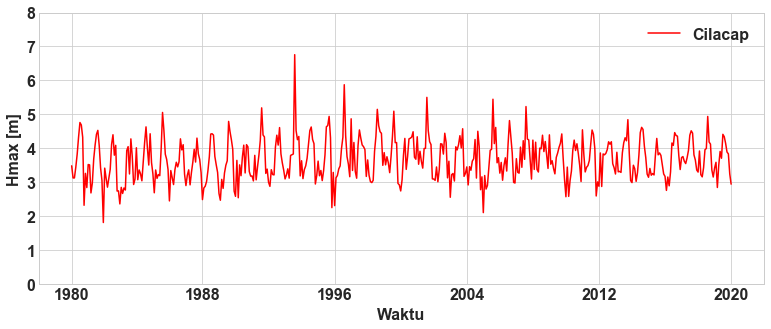

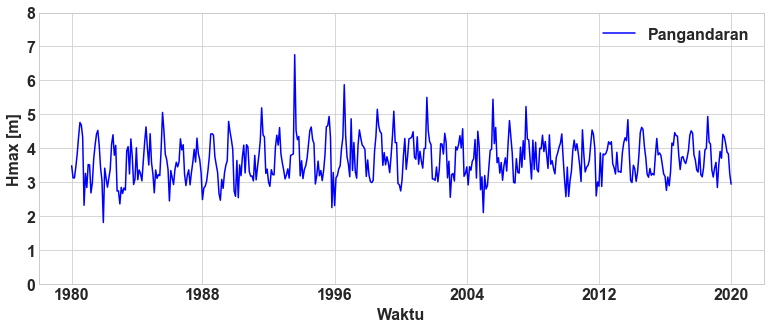

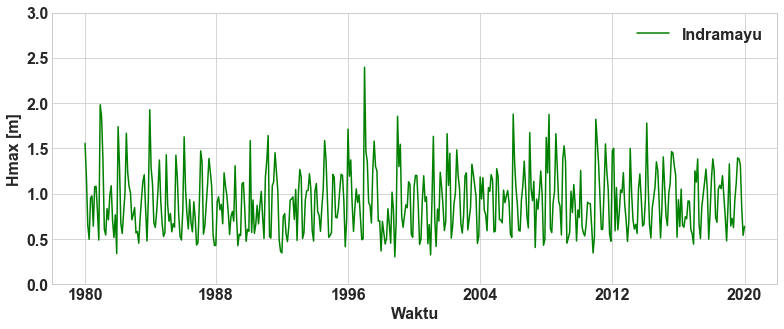

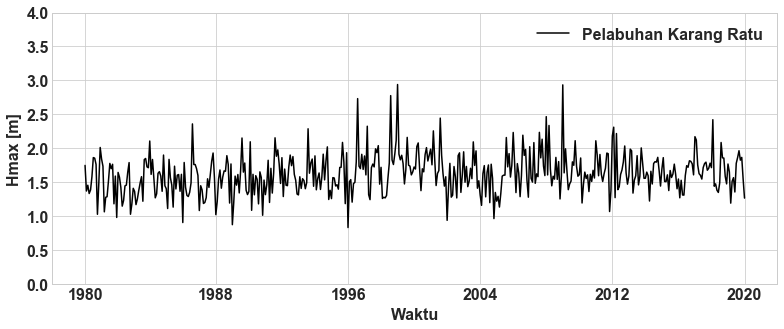

In [134]:
def plot_data(data, lokasi, warna):
    data.plot(figsize=(13,5), linewidth=1.5, color=warna)
    plt.xlabel('Waktu', fontsize=16)
    plt.ylabel('Hmax [m]', fontsize=16)
    plt.ylim(0, np.round(np.max(data)[0]+1))
    plt.xticks([0, 95, 191, 287, 383, 479], 
               [1980, 1988, 1996, 2004, 2012, 2020])
    plt.legend(lokasi)
    plt.grid(True)

plot_data(hmax1, lokasi=["Cilacap"], warna=["red"])
plot_data(hmax2, lokasi=["Pangandaran"], warna=["blue"])
plot_data(hmax3, lokasi=["Indramayu"], warna=["green"])
plot_data(hmax4, lokasi=["Pelabuhan Karang Ratu"], warna=["black"])

### Next
Untuk melihat perbedaan kondisi Hmax disetiap lokasi, maka perlu dibuat overlay plot time series. Selain itu, disini juga akan dianalisi kondisi Hmax pada periode tahun **2017 - 2019**.

### Overlay Hmax di setiap lokasi

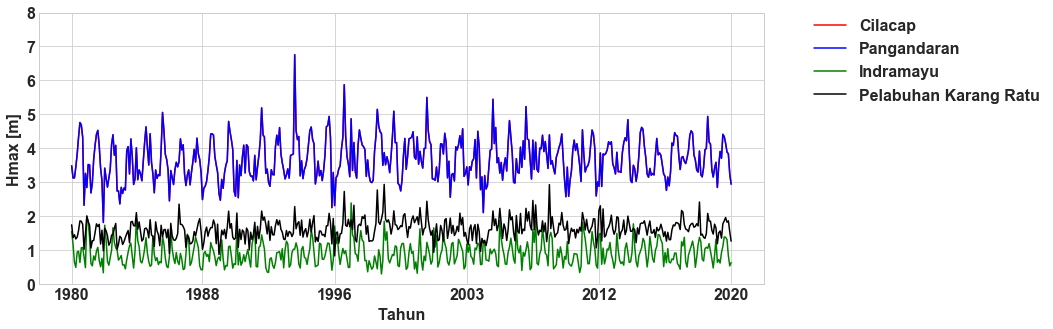

In [135]:
import matplotlib

df_list_data = pd.concat([hmax1, hmax2, hmax3, hmax4], axis=1)

# overlay all data from each location
ax, fig = plt.subplots(figsize=(13,5))
matplotlib.style.use('seaborn-whitegrid')
plt.plot(hmax1, linewidth=1.5, color='red', label='Cilacap')
plt.plot(hmax2, linewidth=1.5, color='blue', label='Pangandaran')
plt.plot(hmax3, linewidth=1.5, color='green', label='Indramayu')
plt.plot(hmax4, linewidth=1.5, color='black', label='Pelabuhan Karang Ratu')
plt.xlabel('Tahun', fontsize=16)
plt.ylabel('Hmax [m]', fontsize=16)
plt.ylim(0, np.round(np.max(df_list_data.max())+1))
plt.xticks([0, 95, 191, 287, 383, 479], 
           [1980, 1988, 1996, 2003, 2012, 2020])
#plt.grid()
plt.legend(['Cilacap','Pangandaran','Indramayu','Pelabuhan Karang Ratu'], bbox_to_anchor=(1.4, 1.03))
#plt.legend(bbox_to_anchor=(1.05, 1.0))

### Overlay Hmax 3 tahun terakhir disetiap lokasi

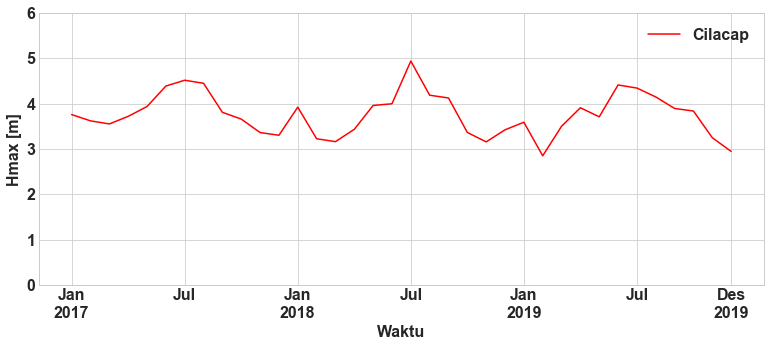

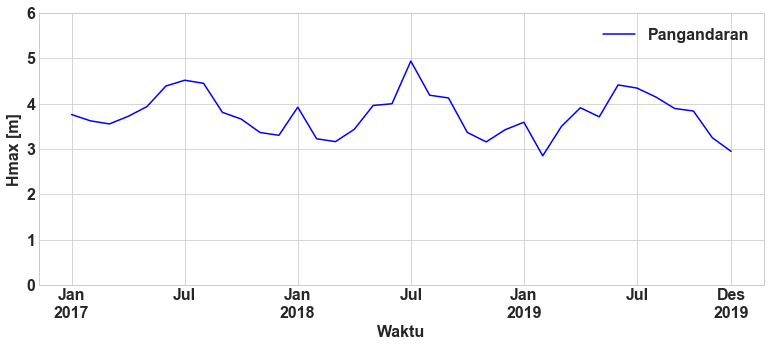

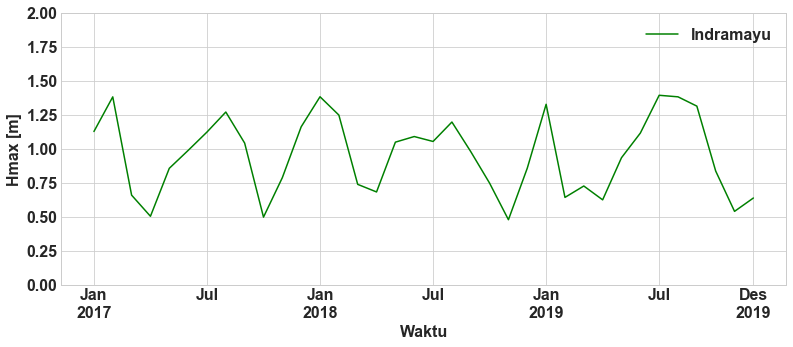

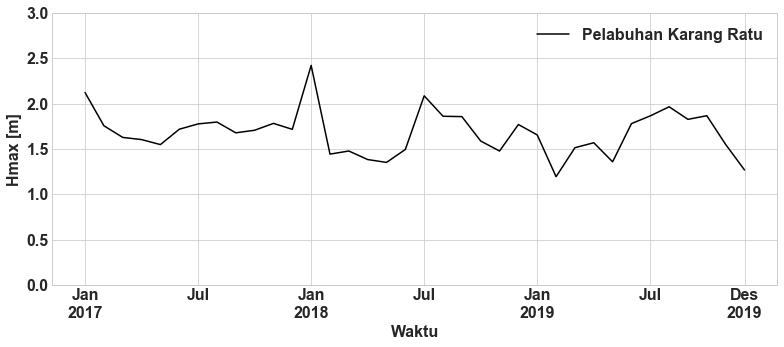

In [136]:
import matplotlib

def plot_data_last_3_years(data, lokasi, warna):
    matplotlib.style.use('seaborn-whitegrid')
    data.plot(figsize=(13,5), linewidth=1.5, color=warna)
    plt.xlabel('Waktu', fontsize=16)
    plt.ylabel('Hmax [m]', fontsize=16)
    plt.ylim(0, np.round(np.max(data)[0]+1))
    plt.xticks([0, 6, 12, 18, 24, 30, 35], 
               ['Jan\n2017', 'Jul', 'Jan\n2018', 'Jul', 'Jan\n2019', 'Jul', 'Des\n2019'])
    plt.legend(lokasi)
    #plt.grid(True)
    
plot_data_last_3_years(hmax1[-36:], lokasi=["Cilacap"], warna=["red"])
plot_data_last_3_years(hmax2[-36:], lokasi=["Pangandaran"], warna=["blue"])
plot_data_last_3_years(hmax3[-36:], lokasi=["Indramayu"], warna=["green"])
plot_data_last_3_years(hmax4[-36:], lokasi=["Pelabuhan Karang Ratu"], warna=["black"])

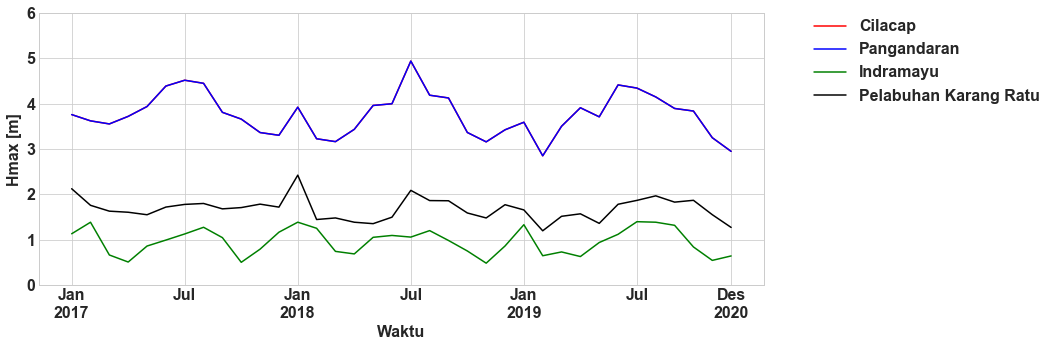

In [137]:
df_list_data3 = pd.concat([hmax1[-36:], hmax2[-36:], hmax3[-36:], hmax4[-36:]], axis=1)

# overlay all data from each location
matplotlib.style.use('seaborn-whitegrid')
ax, fig = plt.subplots(figsize=(13,5))
plt.plot(hmax1[-36:], linewidth=1.5, color='red', label='Cilacap')
plt.plot(hmax2[-36:], linewidth=1.5, color='blue', label='Pangandaran')
plt.plot(hmax3[-36:], linewidth=1.5, color='green', label='Indramayu')
plt.plot(hmax4[-36:], linewidth=1.5, color='black', label='Pelabuhan Karang Ratu')
plt.xlabel('Waktu', fontsize=16)
plt.ylabel('Hmax [m]', fontsize=16)
plt.ylim(0, np.round(np.max(df_list_data3.max())+1))
plt.xticks([0, 6, 12, 18, 24, 30, 35], 
           ['Jan\n2017', 'Jul', 'Jan\n2018', 'Jul', 'Jan\n2019', 'Jul', 'Des\n2020'])
#plt.grid()
plt.legend(['Cilacap','Pangandaran','Indramayu','Pelabuhan Karang Ratu'], bbox_to_anchor=(1.4, 1.03))
#plt.legend(bbox_to_anchor=(1.05, 1.0))

### Inspeksi Hmax ekstrem di setiap lokasi
Untuk meng-inspeksi kondisi Hmax, disini dibuat plot interaktif dgn menggunakan **plotly**.

In [138]:
import plotly

plotly.offline.init_notebook_mode(connected=True)

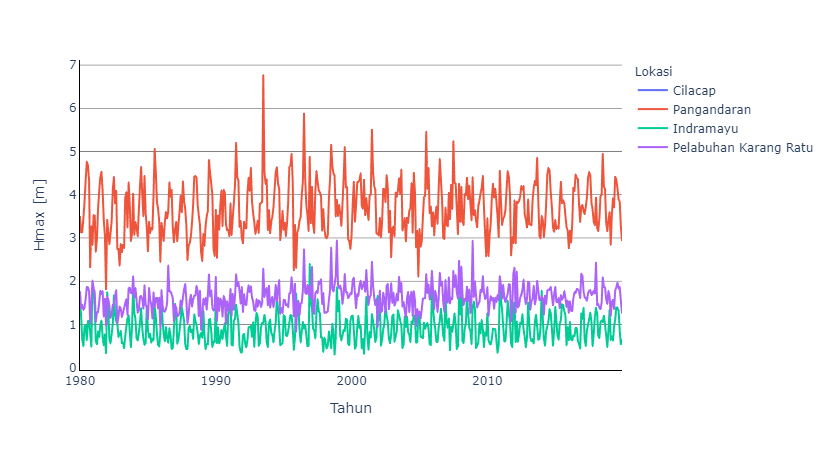

In [139]:
# Using plotly.express
import plotly.express as px

fig = px.line(df_list_data, labels={
    'value':'Hmax [m]',
    'index':'Tahun',
    'variable':'Lokasi'
})
fig.update_layout({
    'plot_bgcolor':'rgba(0,0,0,0)',
    'paper_bgcolor':'rgba(0,0,0,0)'
})
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='black')
fig.show()

### Insights
Dari plot time series ini, secara visual kita bisa tahu kalau:
- Tinggi gelombang maksimum (Hmax) di **Laut Selatan Jawan** (Cilacap dan Pangandaran) jauh lebih tinggi dibandingkan Hmax di **Laut Utara Jawa** (Indramayu dan Pelabuhan Karang Ratu)
- Selatan Jawa (Cilacap dan Indramayu) Hmax Ekstrem paling sering muncul saat musim timur (JJA)
- Utara Jawa (Indramayu dan Pelabuhan Karang Ratu) Hmax Ekstrem paling sering muncul saat musim barat, tapi cukup sering muncul saat musim timur dan peralihan
- Untuk melihat bulan mana yg paling sering muncul Hmax ekstremnya, maka perlu dibuat plot perbulannya

Perlu diketahui, kesimpulan diatas diperoleh secara kualitatif, untuk itu perlu dikuantifikasi untuk memastikan kebenarannya, seperti yg dilakukan selanjutnya.

Glossary:
- DJF: Desember-Januari-Februari (musim barat)
- MAM: Maret-April-Mei (musim peralihan I)
- JJA: Juni-Juli-Agustus (musim timur)
- SON: September-Oktober-November (musim peralihan II)

### Next: Overlay Plot per Bulan
- Perlu dibuat aggregasi data rata2 per bulan
- Dibuat barplot per lokasi
- Dibuat overlay barplot setiap lokasi

Referensi: [Visualisasi data](https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/), [tema matplotlib](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html)

In [140]:
df_list_data_by_month = df_list_data.reset_index()

df_list_data_by_month[['year', 'month']] = df_list_data_by_month['index'].str.split('-', expand=True)
df_list_data_by_month.head()

,index,Cilacap,Pangandaran,Indramayu,Pelabuhan Karang Ratu,year,month
0,1980-01,3.487332,3.487332,1.555658,1.749812,1980,01
1,1980-02,3.130330,3.130330,1.174890,1.372705,1980,02
2,1980-03,3.131297,3.131297,0.648947,1.457730,1980,03
3,1980-04,3.446754,3.446754,0.496943,1.336098,1980,04
4,1980-05,3.829299,3.829299,0.953408,1.388897,1980,05


In [141]:
df_list_data3_by_month = df_list_data3.reset_index()
df_list_data3_by_month[['year', 'month']] = df_list_data3_by_month['index'].str.split('-', expand=True)
df_list_data3_by_month.head()

,index,Cilacap,Pangandaran,Indramayu,Pelabuhan Karang Ratu,year,month
0,2017-01,3.759765,3.759765,1.128702,2.122876,2017,01
1,2017-02,3.621387,3.621387,1.383565,1.756665,2017,02
2,2017-03,3.553356,3.553356,0.660476,1.627832,2017,03
3,2017-04,3.720578,3.720578,0.504923,1.603907,2017,04
4,2017-05,3.937788,3.937788,0.857825,1.548786,2017,05


In [142]:
# Aggregating data by month, with mean value
df_list_data_by_month = pd.pivot_table(df_list_data_by_month, index=['month'], aggfunc= np.mean)
df_list_data3_by_month = pd.pivot_table(df_list_data3_by_month, index=['month'], aggfunc= np.mean)
print('==== Rata-rata Hmax untuk setiap bulan pada periode tahun 1980-2019 ====')
display(df_list_data_by_month)
print('\n==== Rata-rata Hmax untuk setiap bulan pada periode tahun 2017-2019 ====')
display(df_list_data3_by_month)

==== Rata-rata Hmax untuk setiap bulan pada periode tahun 1980-2019 ====


,Cilacap,Indramayu,Pangandaran,Pelabuhan Karang Ratu
month,,,,
01,3.300846,1.250723,3.300846,1.629506
02,3.301476,1.115130,3.301476,1.610961
03,3.249672,0.718302,3.249672,1.528660
04,3.385018,0.588641,3.385018,1.456391
05,3.816697,0.793625,3.816697,1.480753
06,4.152646,0.950946,4.152646,1.655577
07,4.518611,1.132654,4.518611,1.824993
08,4.314914,1.149067,4.314914,1.781147
09,4.115525,0.949798,4.115525,1.813708



==== Rata-rata Hmax untuk setiap bulan pada periode tahun 2017-2019 ====


,Cilacap,Indramayu,Pangandaran,Pelabuhan Karang Ratu
month,,,,
01,3.757949,1.280686,3.757949,2.066809
02,3.232388,1.092390,3.232388,1.464806
03,3.405868,0.709319,3.405868,1.540031
04,3.688565,0.604901,3.688565,1.518864
05,3.869644,0.947990,3.869644,1.419726
06,4.267533,1.066079,4.267533,1.664402
07,4.601360,1.191820,4.601360,1.909857
08,4.262144,1.284780,4.262144,1.874967
09,3.943591,1.113207,3.943591,1.787766


In [143]:
import matplotlib

def plot_bar(data, lokasi, warna):
    matplotlib.style.use('seaborn-whitegrid')
    plt.figure(figsize=(10,5))
    data.plot(kind='bar', color=warna)
    
    plt.xticks(list(np.arange(0,12,1)), 
               ['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Agu','Sep','Okt','Nov','Des'], 
               rotation=0)
    plt.xlabel('Bulan', fontsize=16)
    plt.ylabel('Hmax [m]', fontsize=16)
    plt.ylim(0,6)
    daerah = 'Rata-rata Hmax per Bulan di ' + lokasi + '\nTahun 1980-2019'
    plt.title(daerah, fontsize=16, fontweight='bold')


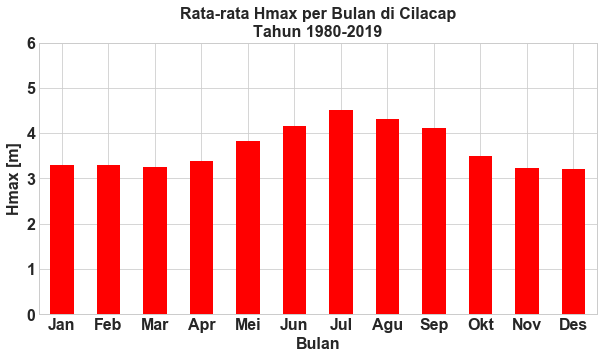

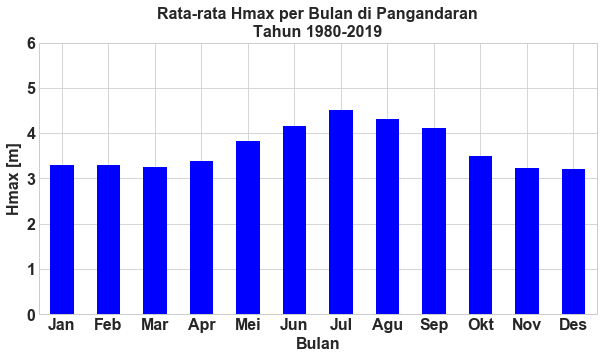

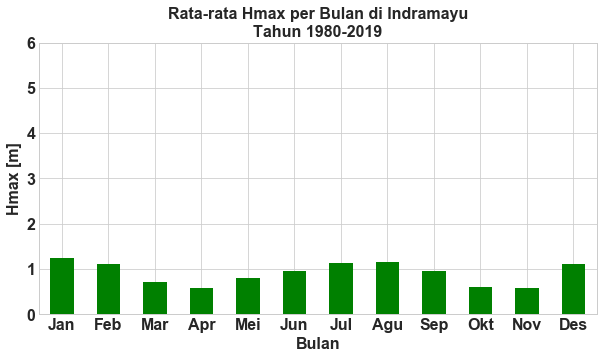

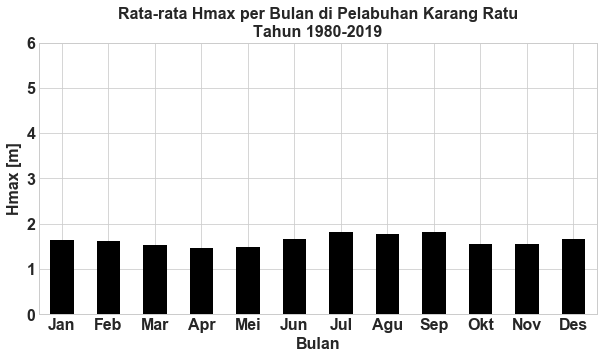

In [144]:
plot_bar(df_list_data_by_month['Cilacap'], lokasi='Cilacap', warna='red')
plot_bar(df_list_data_by_month['Pangandaran'], lokasi='Pangandaran', warna='blue')
plot_bar(df_list_data_by_month['Indramayu'], lokasi='Indramayu', warna='green')
plot_bar(df_list_data_by_month['Pelabuhan Karang Ratu'], lokasi='Pelabuhan Karang Ratu', warna='black')

Text(0.5, 1.0, 'Perbandingan rata-rata Hmax per bulan di setiap lokasi\nTahun 1980-2019')

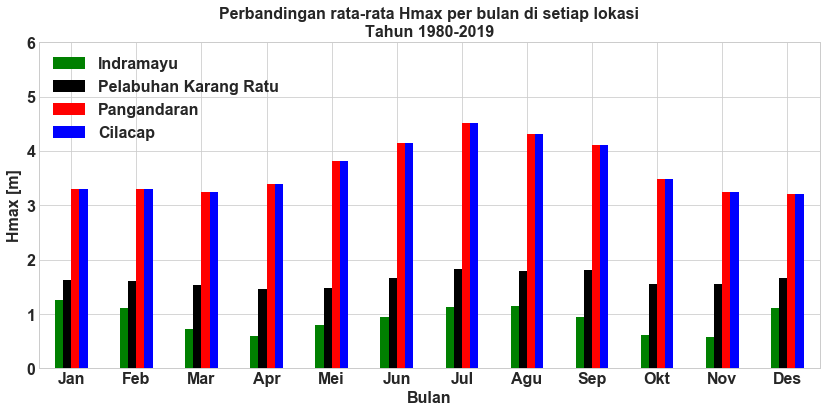

In [145]:
matplotlib.style.use('seaborn-whitegrid')
df_list_data_by_month[['Indramayu','Pelabuhan Karang Ratu','Pangandaran','Cilacap']].plot(
                                                        kind='bar', 
                                                        color=['green','black','red','blue'], 
                                                        figsize=(14,6)
)

plt.xticks(list(np.arange(0,12,1)), 
               ['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Agu','Sep','Okt','Nov','Des'], 
               rotation=0
)

plt.xlabel('Bulan', fontsize=16)
plt.ylabel('Hmax [m]', fontsize=16)
plt.ylim(0,6)
plt.title('Perbandingan rata-rata Hmax per bulan di setiap lokasi\nTahun 1980-2019', fontsize=16, fontweight='bold')

Text(0.5, 1.0, 'Perbandingan rata-rata Hmax per bulan di setiap lokasi\nTahun 1980-2019')

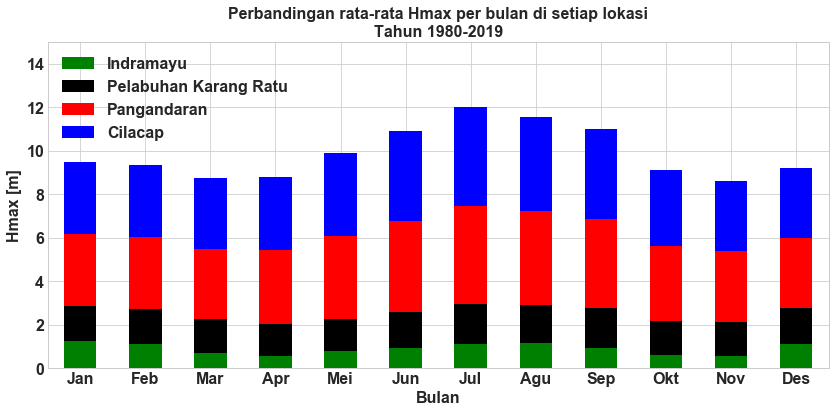

In [146]:
matplotlib.style.use('seaborn-whitegrid')
df_list_data_by_month[['Indramayu','Pelabuhan Karang Ratu','Pangandaran','Cilacap']].plot(
                                                        kind='bar', 
                                                        color=['green','black','red','blue'],
                                                        stacked=True,
                                                        figsize=(14,6)
)

plt.xticks(list(np.arange(0,12,1)), 
               ['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Agu','Sep','Okt','Nov','Des'], 
               rotation=0
)

plt.xlabel('Bulan', fontsize=16)
plt.ylabel('Hmax [m]', fontsize=16)
plt.ylim(0,15)
plt.title('Perbandingan rata-rata Hmax per bulan di setiap lokasi\nTahun 1980-2019', fontsize=16, fontweight='bold')

### Insight
Dari barplot diatas dapat dipastikan bahwa, kondisi Hmax paling ekstrem di masing-masing lokasi adalah pada saat:
- Cilacap: JJA (paling ekstrem di bulan Juli)
- Pangandaran: idem Cilacap
- Indramayu: DJF (Januari) dan JJA (Agustus), dgn DJF paling ekstrem
- Pelabuhan Karang Ratu: DJF (Januari) dan JJA (Juli), dgn JJA paling ekstrem

Glossary:
- DJF: Desember-Januari-Februari (musim barat)
- MAM: Maret-April-Mei (musim peralihan I)
- JJA: Juni-Juli-Agustus (musim timur)
- SON: September-Oktober-November (musim peralihan II)

Text(0.5, 1.0, 'Perbandingan rata-rata Hmax per bulan di setiap lokasi\nTahun 2017-2019')

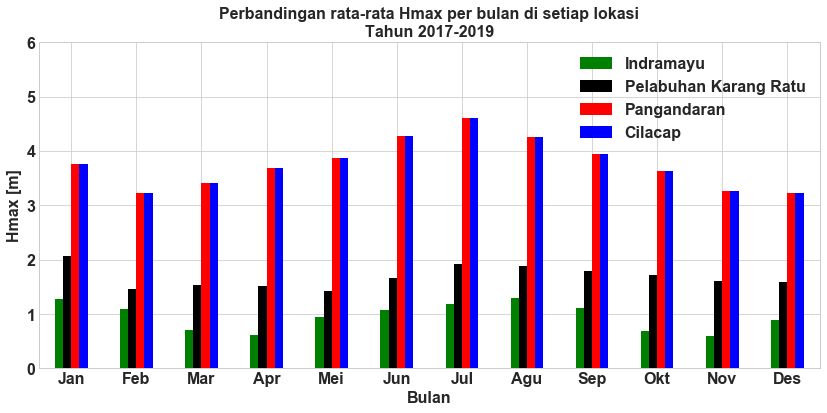

In [147]:
matplotlib.style.use('seaborn-whitegrid')
df_list_data3_by_month[['Indramayu','Pelabuhan Karang Ratu','Pangandaran','Cilacap']].plot(
                                                        kind='bar', 
                                                        color=['green','black','red','blue'], 
                                                        figsize=(14,6)
)

plt.xticks(list(np.arange(0,12,1)), 
               ['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Agu','Sep','Okt','Nov','Des'], 
               rotation=0
)

plt.xlabel('Bulan', fontsize=16)
plt.ylabel('Hmax [m]', fontsize=16)
plt.ylim(0,6)
plt.title('Perbandingan rata-rata Hmax per bulan di setiap lokasi\nTahun 2017-2019', fontsize=16, fontweight='bold')

### Insight
Dari diagram bar diatas, kita bisa tahu bahwa rata-rata untuk setiap bulan, baik itu pada periode 1980-2019 atau 2017-2019, diketahui bahwa:
- Cilacap: Kondisi bulan paling ekstrem terjadi pada bulan **Juli**
- Pangandaran: Kondisi bulan paling ekstrem terjadi pada bulan **Juli**
- Indramayu: Kondisi bulan paling ekstrem terjadi pada bulan **Januari**
- Pelabuhan Karang Ratu: Kondisi bulan paling ekstrem terjadi pada bulan **Januari**

Dari sini terlihat jelas bahwa, untuk perairan di **Laut Utara Jawa**, kondisi paling ekstrem terjadi ketika bulan **Januari** (musim barat), sedangkan untuk perairan **Selatan Jawa**, kondisi paling ekstrem terjadi ketika bulan **Juli** (musim timur).

### Agregasi data per musim

In [148]:
# Agregasi data berdasarkan musim
df_list_data_by_season = pd.DataFrame(columns=['Cilacap','Pangandaran','Indramayu','Pelabuhan Karang Ratu'])
df_list_data_by_season.loc['DJF'] = df_list_data_by_month.iloc[[-1,0,1]].mean(axis=0)
df_list_data_by_season.loc['MAM'] = df_list_data_by_month.iloc[[2,3,4]].mean(axis=0)
df_list_data_by_season.loc['JJA'] = df_list_data_by_month.iloc[[5,6,7]].mean(axis=0)
df_list_data_by_season.loc['SON'] = df_list_data_by_month.iloc[[8,9,10]].mean(axis=0)
df_list_data_by_season

,Cilacap,Pangandaran,Indramayu,Pelabuhan Karang Ratu
DJF,3.272502,3.272502,1.160657,1.632337
MAM,3.483796,3.483796,0.700189,1.488601
JJA,4.328723,4.328723,1.077556,1.753906
SON,3.612951,3.612951,0.714249,1.639058


Text(0.5, 1.0, 'Perbandingan rata-rata Hmax per musim di setiap lokasi\nTahun 1980-2019')

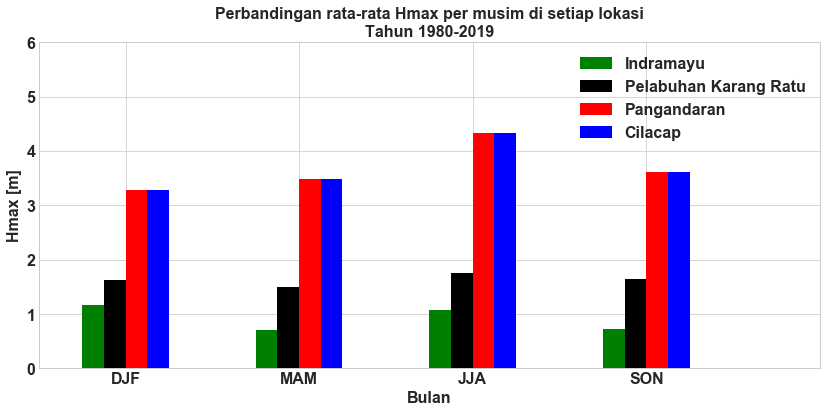

In [149]:
# plot diagram bar
matplotlib.style.use('seaborn-whitegrid')
df_list_data_by_season[['Indramayu','Pelabuhan Karang Ratu','Pangandaran','Cilacap']].plot(
                                                        kind='bar', 
                                                        color=['green','black','red','blue'], 
                                                        figsize=(14,6)
)

plt.xticks(list(np.arange(0,5,1)), 
               ['DJF','MAM','JJA','SON'], 
               rotation=0
)

plt.xlabel('Bulan', fontsize=16)
plt.ylabel('Hmax [m]', fontsize=16)
plt.ylim(0,6)
plt.title('Perbandingan rata-rata Hmax per musim di setiap lokasi\nTahun 1980-2019', fontsize=16, fontweight='bold')

In [150]:
# Agregasi data berdasarkan musim
df_list_data3_by_season = pd.DataFrame(columns=['Cilacap','Pangandaran','Indramayu','Pelabuhan Karang Ratu'])
df_list_data3_by_season.loc['DJF'] = df_list_data3_by_month.iloc[[-1,0,1]].mean(axis=0)
df_list_data3_by_season.loc['MAM'] = df_list_data3_by_month.iloc[[2,3,4]].mean(axis=0)
df_list_data3_by_season.loc['JJA'] = df_list_data3_by_month.iloc[[5,6,7]].mean(axis=0)
df_list_data3_by_season.loc['SON'] = df_list_data3_by_month.iloc[[8,9,10]].mean(axis=0)
df_list_data3_by_season

,Cilacap,Pangandaran,Indramayu,Pelabuhan Karang Ratu
DJF,3.405024,3.405024,1.086772,1.705641
MAM,3.654692,3.654692,0.754070,1.492873
JJA,4.377012,4.377012,1.180893,1.816409
SON,3.607124,3.607124,0.803847,1.704009


Text(0.5, 1.0, 'Perbandingan rata-rata Hmax per musim di setiap lokasi\nTahun 2017-2019')

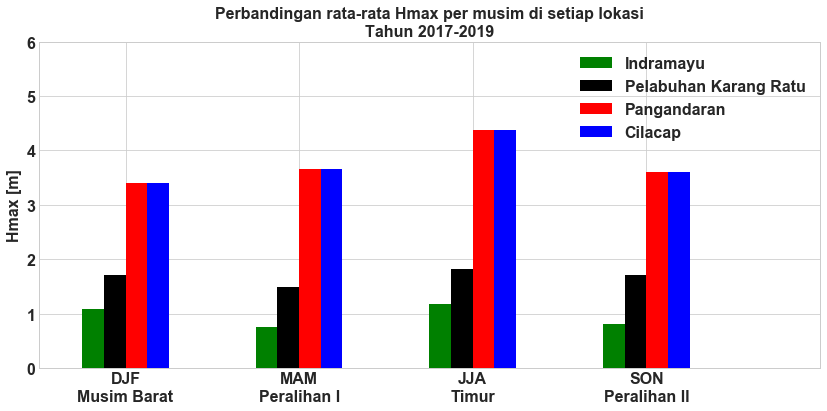

In [151]:
# plot diagram bar
matplotlib.style.use('seaborn-whitegrid')
df_list_data3_by_season[['Indramayu','Pelabuhan Karang Ratu','Pangandaran','Cilacap']].plot(
                                                        kind='bar', 
                                                        color=['green','black','red','blue'], 
                                                        figsize=(14,6)
)

plt.xticks(list(np.arange(0,5,1)), 
               ['DJF\nMusim Barat','MAM\nPeralihan I','JJA\nTimur','SON\nPeralihan II'], 
               rotation=0
)

#plt.xlabel('Musim', fontsize=16)
plt.ylabel('Hmax [m]', fontsize=16)
plt.ylim(0,6)
plt.title('Perbandingan rata-rata Hmax per musim di setiap lokasi\nTahun 2017-2019', fontsize=16, fontweight='bold')

In [152]:
df_list_data_by_season_T = df_list_data_by_season.transpose()
df_list_data_by_season_T

,DJF,MAM,JJA,SON
Cilacap,3.272502,3.483796,4.328723,3.612951
Pangandaran,3.272502,3.483796,4.328723,3.612951
Indramayu,1.160657,0.700189,1.077556,0.714249
Pelabuhan Karang Ratu,1.632337,1.488601,1.753906,1.639058


In [153]:
df_list_data3_by_season_T = df_list_data3_by_season.transpose()
df_list_data3_by_season_T

,DJF,MAM,JJA,SON
Cilacap,3.405024,3.654692,4.377012,3.607124
Pangandaran,3.405024,3.654692,4.377012,3.607124
Indramayu,1.086772,0.754070,1.180893,0.803847
Pelabuhan Karang Ratu,1.705641,1.492873,1.816409,1.704009


Text(0.5, 1.0, 'Perbandingan rata-rata Hmax per musim di setiap lokasi\nTahun 1980-2019')

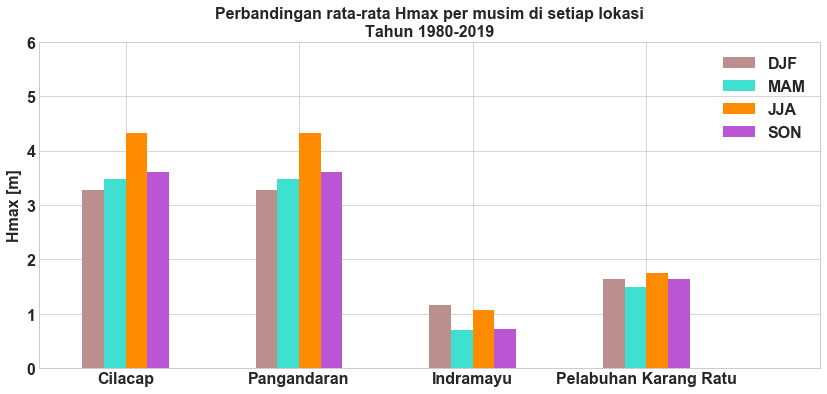

In [154]:
# plot diagram bar
matplotlib.style.use('seaborn-whitegrid')
df_list_data_by_season_T.plot(
                               kind='bar', 
                               color=['rosybrown','turquoise','darkorange','mediumorchid'], 
                               figsize=(14,6)
)

plt.xticks(list(np.arange(0,5,1)), 
               #['DJF\nMusim Barat','MAM\nPeralihan I','JJA\nTimur','SON\nPeralihan II'], 
               rotation=0
)

#plt.xlabel('Lokasi', fontsize=16)
plt.ylabel('Hmax [m]', fontsize=16)
plt.ylim(0,6)
plt.title('Perbandingan rata-rata Hmax per musim di setiap lokasi\nTahun 1980-2019', fontsize=16, fontweight='bold')

Text(0.5, 1.0, 'Perbandingan rata-rata Hmax per musim di setiap lokasi\nTahun 2017-2019')

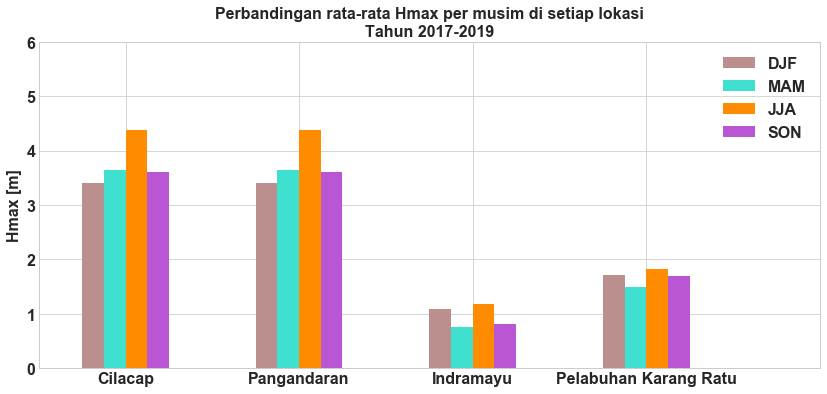

In [155]:
# plot diagram bar
matplotlib.style.use('seaborn-whitegrid')
df_list_data3_by_season_T.plot(
                               kind='bar', 
                               color=['rosybrown','turquoise','darkorange','mediumorchid'], 
                               figsize=(14,6)
)

plt.xticks(list(np.arange(0,5,1)), 
               #['DJF\nMusim Barat','MAM\nPeralihan I','JJA\nTimur','SON\nPeralihan II'], 
               rotation=0
)

#plt.xlabel('Lokasi', fontsize=16)
plt.ylabel('Hmax [m]', fontsize=16)
plt.ylim(0,6)
plt.title('Perbandingan rata-rata Hmax per musim di setiap lokasi\nTahun 2017-2019', fontsize=16, fontweight='bold')

### Insight
Diagram bar diatas digunakan untuk menganalisa kondisi musim yg paling ekstrem di masing-masing lokasi, yaitu:
- Cilacap: musim paling ekstrem terjadi pada **musim timur (JJA)**
- Pangandaran: musim paling ekstrem terjadi pada **musim timur (JJA)**
- Indramayu: musim paling ekstrem terjadi pada **musim timur (JJA)**
- Pelabuhan Karang Ratu: musim paling ekstrem terjadi pada **musim timur (JJA)**

Dari sini ada **temuan menarik** untuk **Indramayu** dan **Pelabuhan Karang Ratu**, karena seperti yg kita tahu bahwa keduanya memiliki kondisi **bulan** paling ekstrem pada bulan **Januari**, sedangkan ketika dibuat rata-rata per musim, kondisi **musim** paling ekstrem adalah **musim timur**. 

Temuan yg disebutkan pada paragraf sebelumnya terjadi karena, pada bulan **Desember** dan **Februari**, kondisi Hmax-nya tidak begitu ekstrem, jika dibandingkan bulan **Juni**, **Juli**, dan **Agustus**. Sehingga ketika dirata-ratakan, nilai Hmax pada **musim barat (DJF) cenderung lebih kecil dibanding musim timur (JJA)**.

Glossary:
- DJF: Desember-Januari-Februari (**musim barat**)
- MAM: Maret-April-Mei (**musim peralihan I**)
- JJA: Juni-Juli-Agustus (**musim timur**)
- SON: September-Oktober-November (**musim peralihan II**)